# Join Data in Pandas
## Data Merging Basic
### 1. Inner Join

In [ ]:
# Inner Join
import pandas as pd
a_b = a.merge(b, on='ward') 
#* Data frame A will appear in front of data frame B
# Duplicate columns will be named as column_x,column_y by default, to change this, we can use `suffixes =``
a_b = a.merge(b, on='ward',suffixes=('_a','_b'))
# Merge with different column name
movies_and_scifi_only = movies.merge(scifi_only,left_on='id',right_on='id_sci',how='inner')

# Left Join
a_b = a.merge(b, on='ward',how = 'left') #* Left join will always return the same row as the left table

# Outer Join - Return all the possible combination of 2 tables
a_b = a.merge(b, on='ward',how = 'outer')

# Merge to itself
a_sequels = a.merge(a, left_on='a_ndex', right_on='id'how='left',suffixes=('_org','_seg'))

# Index merge
# If a dataframe has multiple index
movies_genres = movies.merge(movie_to_genres, on=['id','movie_name'])
# If indexes of two table are different
movies_genres = movies.merge(movie_to_genres, left_on='id', left_index=True,right_on='movie_id', right_index=True)

### 2. Multiple Join

In [ ]:
#Merge 4 tables
df1.merge(df2,on='col').merge(df3,on='col').merge(df4,on='col')
# If the code is too long, it may cause error. Use '\' to connect long code
df1.merge(df2,on='col')\
    .merge(df3,on='col')\
        .merge(df4,on='col')


### 3. Merged Order
> When to use merge_ordered:
1. Ordered data / time series
2. Filling in missing values

In [ ]:
pd.merge_ordered(aapl, mcd,on='date',suffixes=('_aapl','_mcd'),fill_method='ffill') # Default: Outer Merge
# fill_method='ffill' is forward fill. ie: Line 40 is null, this will fill the line value with value in line 39.

### 4.Merged_asof
Match on the nearest key column and not exact matches.
Merged "on" columns must be sorted
> When to use merged_asof
1. Data sampled from a process
2. Developing a training set (no data leakage)

In [ ]:
pd.merge_asof(visa,ibm,on=['date_time'],suffixes=('_visa','_ibm'),direction='forward') # direction = 'backward'/ direction = 'nearest'

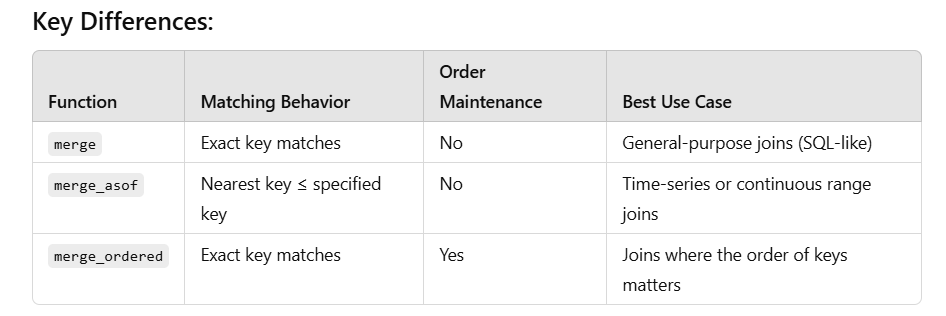

## Filtering Join


### anti join
Returns the left table, excluding the intersection
Returns only columns from the left table and not the right

First merging the tables with a left join, selecting the ID of A who did not have B, and then subsetting the A.

In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

### semi join
Returns the intersection, similar to an inner join
Returns only columns from the left table and not the right

In [ ]:
# Merge the non_mus_tcks and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices,on = 'tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':"count"})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres,on='gid'))

## Filtering data with ``.query()``

In [ ]:
#Select text
stocks_long.query('stock=="disney" or(stock=="nike" and close < 90)') 
#Select value
stocks.query('nike>96 or disney < 98')

## Reshape data with ``.query()``
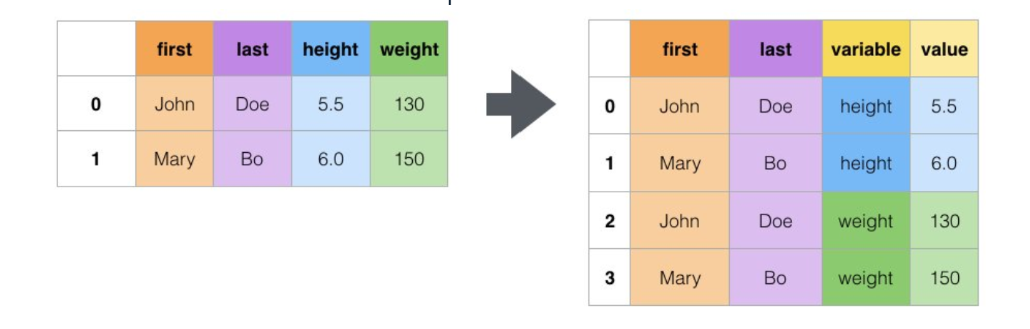

In [ ]:
social_tall = social_fin.melt(id_vars=['financial','company'], # The variables that go to columns
value_vars=['2018','2017'] # The variables that go to rows
var_name='year',value_name='dollars') # Set name for the variable columns

## Concatenate  Tables
### Basic Concatenate

In [ ]:
pd.concat([table_1,table_2,table_3])
# Ignoring the index
pd.concat([table_1,table_2,table_3],ignore_index=True) # set new index from 0 to n-1
# Setting labels to original tables
pd.concat([table_1,table_2,table_3],ignore_index=False,keys=['a','b','c']) 
# Concate with different column names
pd.concat([table_1,table_2,table_3],sort = True)
# Concate with different column names, only concat columns with the same name
pd.concat([table_1,table_2,table_3],join = 'inner')


## Validate before Merge or Concatenate
**Validate Relationship:** Checks if merge is of specified type


In [ ]:
tracks.merge(specs,on='tid'validate='one_to_one')
# If the relationship is not one-to-one, will return error

**Validate Duplicate index:**Check whether the new concatenated index contains duplicates
Default value is ``False``

In [ ]:
pd.concat([inv_feb,inv_mar]verify_integrity=True)